In [1]:
import sys
import os
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import json

current_dir = os.getcwd()
src_dir = os.path.join(current_dir, '..')

if src_dir not in sys.path:
    sys.path.append(src_dir)

from src.enums import DataSplit
from src.utils.visualize import show_images_with_masks
from src.tumor_dataset import TumorSemanticSegmentationDataset
from src.utils.transforms import DualInputCompose, DualInputTransform, DualInputResize

In [2]:
DATASETS_ROOT = os.path.join(current_dir, '..', 'datasets')
BATCH_SIZE = 16

Data shapes:  torch.Size([16, 3, 640, 640]) torch.Size([16, 1, 640, 640])


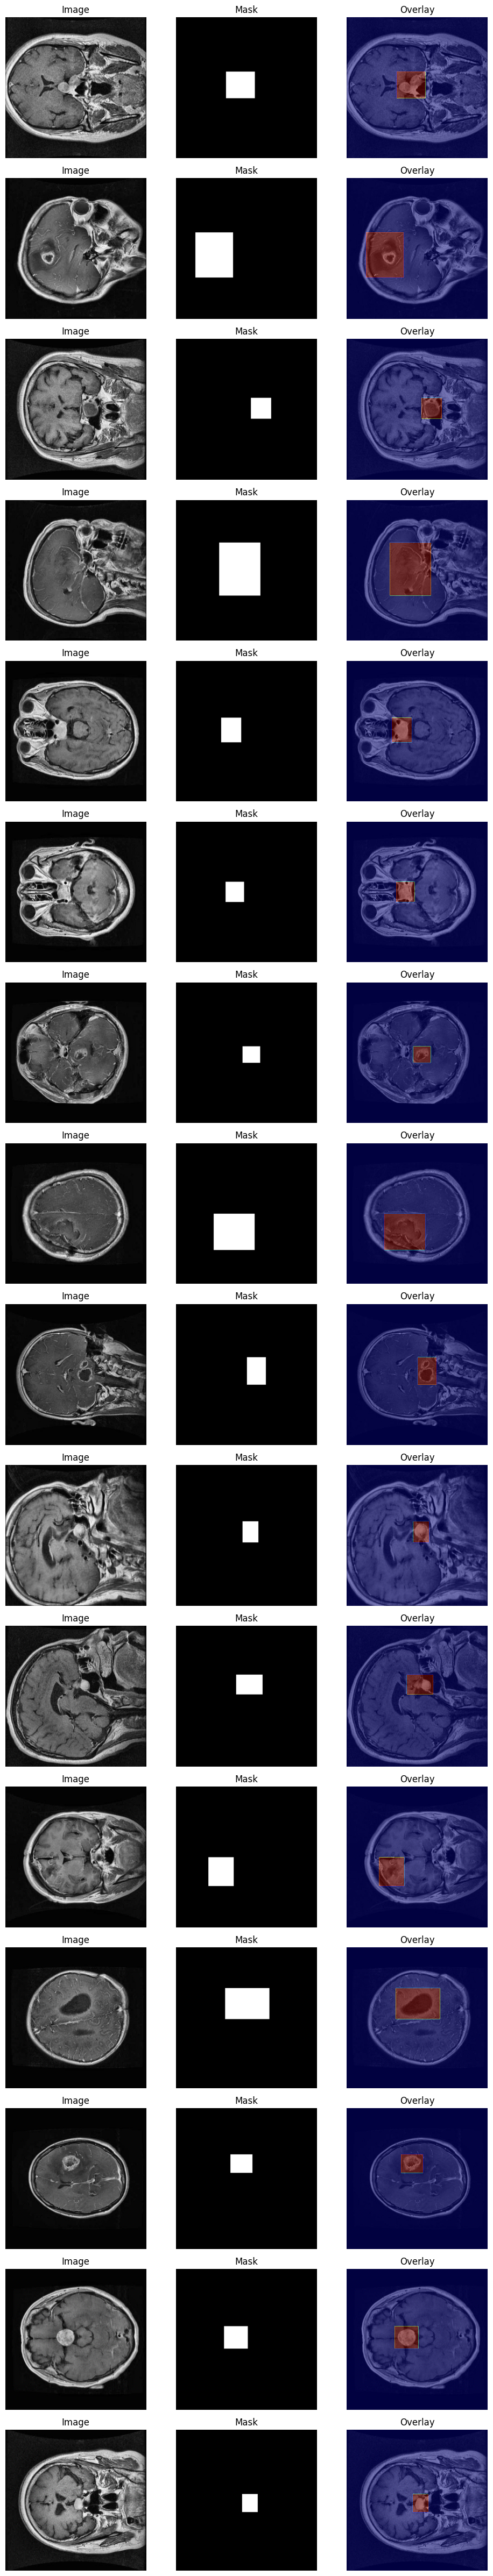

In [3]:
dataset = TumorSemanticSegmentationDataset(root_dir=DATASETS_ROOT, split=DataSplit.TRAIN, transform=DualInputTransform(transforms.ToTensor()))
data_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
images, masks = next(iter(data_loader)) # get a batch of data
print('Data shapes: ',images.shape, masks.shape)
show_images_with_masks(images, masks, nmax=BATCH_SIZE)

In [ ]:
# Try resizing images to 320x320
resize_transform = DualInputCompose([
    DualInputResize((320, 320)),
    DualInputTransform(transforms.ToTensor())
])

dataset = TumorSemanticSegmentationDataset(root_dir=DATASETS_ROOT, split=DataSplit.TRAIN, transform=resize_transform)
print(f'Dataset length: {len(dataset)}')
data_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
images, masks = next(iter(data_loader)) # get a batch of data
print(f'Images shape: {images.shape}, Masks shape: {masks.shape}')
show_images_with_masks(images, masks, nmax=BATCH_SIZE)